# 필요한 라이브러리 설치

In [46]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.n

# 전체적으로 사용되는 함수 및 변수

In [47]:
hifi_dir = '/content/drive/MyDrive/MyData/hifi'
grayscaled_lofi_dir = '/content/drive/MyDrive/MyData/grayscaled_lofi'
styled_lofi_dir = '/content/drive/MyDrive/MyData/styled_lofi'
model_gen_weight_file = '/content/drive/MyDrive/MyData/model_gen.pt'
model_dis_weight_file = '/content/drive/MyDrive/MyData/model_dis.pt'

# 자료 저장할 폴더 만들기
def create_dir(name):
    if not os.path.isdir(name):
        os.makedirs(name)

# 웹 크롤링 (앱 디자인 이미지 가져오기)
---
- https://pgh268400.tistory.com/286
- https://velog.io/@jungeun-dev/Python-%EC%9B%B9-%ED%81%AC%EB%A1%A4%EB%A7%81Selenium-%EA%B5%AC%EA%B8%80-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%88%98%EC%A7%91
- https://blog.naver.com/PostView.nhn?blogId=jinyuri303&logNo=222268855640&categoryNo=39&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView

In [48]:
import time
import os
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)
 
# 구글 이미지 검색창으로 이동
url = "https://www.google.co.kr/imghp?hl=ko" 
driver.get(url)

# 해당 키워드 검색하기
keyword = 'app design'
search_box = driver.find_element(By.NAME, 'q')
search_box.send_keys(keyword)
search_box.send_keys(Keys.ENTER)

# 처음에는 일부 이미지만 보여지기 때문에, 스크롤을 내려서 더 불러오기
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 
    time.sleep(1)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        try:
            driver.find_element(By.CSS_SELECTOR, ".mye4qd").click()
        except:
            break
    last_height = new_height

# 폴더 만들고 이미지 저장하기
create_dir(hifi_dir)
imgs = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")
actions = ActionChains(driver)

count = 1
for i, img in enumerate(imgs):
    print("\r" + str(i+1) + "/" + str(len(imgs)), end='  ')
    try:
        actions.move_to_element(img).click().perform()
        time.sleep(2)
        img_url = driver.find_element(By.CSS_SELECTOR, ".n3VNCb.KAlRDb").get_attribute('src')
        file_path = hifi_dir + '/img' + str(count) + '.jpg'
        req = requests.get(img_url)
        with open(file_path, 'wb') as outfile:
            outfile.write(req.content)
        count += 1
    except:
        print('fail')
        pass

driver.close()

2/796  fail
223/796  fail
267/796  fail
268/796  fail
285/796  fail
324/796  fail
330/796  fail
340/796  fail
420/796  fail
433/796  fail
436/796  fail
512/796  fail
587/796  fail
605/796  fail
612/796  fail
690/796  fail
733/796  fail
765/796  fail
770/796  fail
790/796  fail
796/796  fail


# 기존 이미지 흑백으로 바꿔서 저장
---
- https://swlock.blogspot.com/2021/10/python-count-files.html
- https://www.delftstack.com/ko/howto/python/convert-image-to-grayscale-python/

In [49]:
from PIL import Image

create_dir(grayscaled_lofi_dir)
files = os.listdir(hifi_dir)
files_cnt = len(files)
for i, filename in enumerate(files):
    print("\r" + str(i+1) + "/" + str(files_cnt), end='  ')
    try:
        img = Image.open(hifi_dir+'/'+filename)
        file_path = grayscaled_lofi_dir + '/img' + filename[3:]
        img.convert('L').save(file_path)
    except:
        print('fail')
        pass

34/775  

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


103/775  fail
131/775  fail
138/775  fail
156/775  fail
168/775  fail
172/775  fail
173/775  fail
208/775  fail
216/775  fail
263/775  fail
284/775  fail
293/775  fail
298/775  fail
330/775  fail
331/775  fail
350/775  fail
362/775  fail
365/775  fail
369/775  fail
378/775  fail
401/775  fail
404/775  fail
405/775  fail
457/775  fail
481/775  fail
499/775  fail
503/775  fail
510/775  fail
540/775  fail
543/775  fail
547/775  fail
568/775  fail
610/775  fail
633/775  fail
635/775  fail
706/775  fail
714/775  fail
728/775  fail
739/775  fail
775/775  

# 데이터 준비하기
---
- https://github.com/Seonghoon-Yu/AI_Paper_Review/blob/master/GAN/pix2pix(2016).ipynb

In [50]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [51]:
# Costum dataset 생성
class FacadeDataset(Dataset):
    def __init__(self, lofi_dir, transform=False):
        super().__init__()
        self.lofi_dir = lofi_dir
        self.img_filenames = [x for x in os.listdir(self.lofi_dir)]
        self.transform = transform

    def __getitem__(self, index):
        a = Image.open(hifi_dir+'/'+self.img_filenames[index]).convert('RGB')
        b = Image.open(self.lofi_dir+'/'+self.img_filenames[index]).convert('RGB')
        
        if self.transform:
            a = self.transform(a)
            b = self.transform(b)

        return b,a

    def __len__(self):
        return len(self.img_filenames)

In [52]:
# transforms 정의
transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5]),
                    transforms.Resize((256,256))
])

train_ds = FacadeDataset(grayscaled_lofi_dir, transform=transform)

# 데이터 로더 생성하기
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

(-0.5, 255.5, 255.5, -0.5)

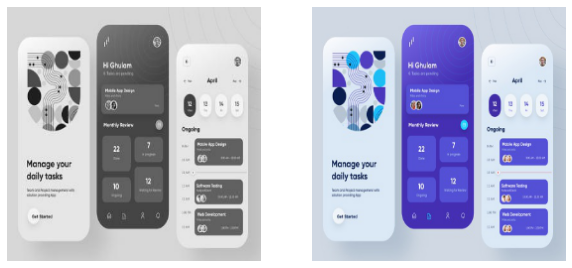

In [53]:
# 샘플 이미지 확인하기
a,b = train_ds[0]
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(to_pil_image(0.5*a+0.5))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(to_pil_image(0.5*b+0.5))
plt.axis('off')

# 모델 구축하기
---
- https://github.com/Seonghoon-Yu/AI_Paper_Review/blob/master/GAN/pix2pix(2016).ipynb

In [54]:
# UNet
class UNetDown(nn.Module):
    def __init__(self, in_channels, out_channels, normalize=True, dropout=0.0):
        super().__init__()

        layers = [nn.Conv2d(in_channels, out_channels, 4, stride=2, padding=1, bias=False)]

        if normalize:
            layers.append(nn.InstanceNorm2d(out_channels)),

        layers.append(nn.LeakyReLU(0.2))

        if dropout:
            layers.append(nn.Dropout(dropout))

        self.down = nn.Sequential(*layers)

    def forward(self, x):
        x = self.down(x)
        return x

# check
x = torch.randn(16, 3, 256,256, device=device)
model = UNetDown(3,64).to(device)
down_out = model(x)
print(down_out.shape)

torch.Size([16, 64, 128, 128])


In [55]:
class UNetUp(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.0):
        super().__init__()

        layers = [
            nn.ConvTranspose2d(in_channels, out_channels,4,2,1,bias=False),
            nn.InstanceNorm2d(out_channels),
            nn.LeakyReLU()
        ]

        if dropout:
            layers.append(nn.Dropout(dropout))

        self.up = nn.Sequential(*layers)

    def forward(self,x,skip):
        x = self.up(x)
        x = torch.cat((x,skip),1)
        return x

# check
x = torch.randn(16, 128, 64, 64, device=device)
model = UNetUp(128,64).to(device)
out = model(x,down_out)
print(out.shape)

torch.Size([16, 128, 128, 128])


In [56]:
# generator: 가짜 이미지를 생성합니다.
class GeneratorUNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super().__init__()

        self.down1 = UNetDown(in_channels, 64, normalize=False)
        self.down2 = UNetDown(64,128)                 
        self.down3 = UNetDown(128,256)               
        self.down4 = UNetDown(256,512,dropout=0.5) 
        self.down5 = UNetDown(512,512,dropout=0.5)      
        self.down6 = UNetDown(512,512,dropout=0.5)             
        self.down7 = UNetDown(512,512,dropout=0.5)              
        self.down8 = UNetDown(512,512,normalize=False,dropout=0.5)

        self.up1 = UNetUp(512,512,dropout=0.5)
        self.up2 = UNetUp(1024,512,dropout=0.5)
        self.up3 = UNetUp(1024,512,dropout=0.5)
        self.up4 = UNetUp(1024,512,dropout=0.5)
        self.up5 = UNetUp(1024,256)
        self.up6 = UNetUp(512,128)
        self.up7 = UNetUp(256,64)
        self.up8 = nn.Sequential(
            nn.ConvTranspose2d(128,3,4,stride=2,padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)
        d5 = self.down5(d4)
        d6 = self.down6(d5)
        d7 = self.down7(d6)
        d8 = self.down8(d7)

        u1 = self.up1(d8,d7)
        u2 = self.up2(u1,d6)
        u3 = self.up3(u2,d5)
        u4 = self.up4(u3,d4)
        u5 = self.up5(u4,d3)
        u6 = self.up6(u5,d2)
        u7 = self.up7(u6,d1)
        u8 = self.up8(u7)

        return u8

# check
x = torch.randn(16,3,256,256,device=device)
model = GeneratorUNet().to(device)
out = model(x)
print(out.shape)

torch.Size([16, 3, 256, 256])


In [57]:
class Dis_block(nn.Module):
    def __init__(self, in_channels, out_channels, normalize=True):
        super().__init__()

        layers = [nn.Conv2d(in_channels, out_channels, 3, stride=2, padding=1)]
        if normalize:
            layers.append(nn.InstanceNorm2d(out_channels))
        layers.append(nn.LeakyReLU(0.2))
    
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        x = self.block(x)
        return x

# check
x = torch.randn(16,64,128,128,device=device)
model = Dis_block(64,128).to(device)
out = model(x)
print(out.shape)

torch.Size([16, 128, 64, 64])


In [58]:
# Discriminator은 patch gan을 사용합니다.
# Patch Gan: 이미지를 16x16의 패치로 분할하여 각 패치가 진짜인지 가짜인지 식별합니다.
# high-frequency에서 정확도가 향상됩니다.

class Discriminator(nn.Module):
    def __init__(self, in_channels=3):
        super().__init__()

        self.stage_1 = Dis_block(in_channels*2,64,normalize=False)
        self.stage_2 = Dis_block(64,128)
        self.stage_3 = Dis_block(128,256)
        self.stage_4 = Dis_block(256,512)

        self.patch = nn.Conv2d(512,1,3,padding=1) # 16x16 패치 생성

    def forward(self,a,b):
        x = torch.cat((a,b),1)
        x = self.stage_1(x)
        x = self.stage_2(x)
        x = self.stage_3(x)
        x = self.stage_4(x)
        x = self.patch(x)
        x = torch.sigmoid(x)
        return x
# check
x = torch.randn(16,3,256,256,device=device)
model = Discriminator().to(device)
out = model(x,x)
print(out.shape)

torch.Size([16, 1, 16, 16])


In [59]:
model_gen = GeneratorUNet().to(device)
model_dis = Discriminator().to(device)

# 가중치 초기화
def initialize_weights(model):
    class_name = model.__class__.__name__
    if class_name.find('Conv') != -1:
        nn.init.normal_(model.weight.data, 0.0, 0.02)


# 가중치 초기화 적용
model_gen.apply(initialize_weights);
model_dis.apply(initialize_weights);

# 학습하기
---
- https://github.com/Seonghoon-Yu/AI_Paper_Review/blob/master/GAN/pix2pix(2016).ipynb

In [60]:
# 손실함수
loss_func_gan = nn.BCELoss()
loss_func_pix = nn.L1Loss()

# loss_func_pix 가중치
lambda_pixel = 100

# patch 수
patch = (1,256//2**4,256//2**4)

# 최적화 파라미터
from torch import optim
lr = 2e-4
beta1 = 0.5
beta2 = 0.999

opt_dis = optim.Adam(model_dis.parameters(),lr=lr,betas=(beta1,beta2))
opt_gen = optim.Adam(model_gen.parameters(),lr=lr,betas=(beta1,beta2))

In [61]:
# 학습
model_gen.train()
model_dis.train()

batch_count = 0
num_epochs = 100
start_time = time.time()

loss_hist = {'gen':[],
             'dis':[]}

for epoch in range(num_epochs):
    for a, b in train_dl:
        ba_si = a.size(0)

        # real image
        real_a = a.to(device)
        real_b = b.to(device)

        # patch label
        real_label = torch.ones(ba_si, *patch, requires_grad=False).to(device)
        fake_label = torch.zeros(ba_si, *patch, requires_grad=False).to(device)

        # generator
        model_gen.zero_grad()

        fake_b = model_gen(real_a) # 가짜 이미지 생성
        out_dis = model_dis(fake_b, real_b) # 가짜 이미지 식별

        gen_loss = loss_func_gan(out_dis, real_label)
        pixel_loss = loss_func_pix(fake_b, real_b)

        g_loss = gen_loss + lambda_pixel * pixel_loss
        g_loss.backward()
        opt_gen.step()

        # discriminator
        model_dis.zero_grad()

        out_dis = model_dis(real_b, real_a) # 진짜 이미지 식별
        real_loss = loss_func_gan(out_dis,real_label)
        
        out_dis = model_dis(fake_b.detach(), real_a) # 가짜 이미지 식별
        fake_loss = loss_func_gan(out_dis,fake_label)

        d_loss = (real_loss + fake_loss) / 2.
        d_loss.backward()
        opt_dis.step()

        loss_hist['gen'].append(g_loss.item())
        loss_hist['dis'].append(d_loss.item())

        batch_count += 1
        if batch_count % 10 == 0:
            print('Epoch: %.0f, G_Loss: %.6f, D_Loss: %.6f, time: %.2f min' %(epoch, g_loss.item(), d_loss.item(), (time.time()-start_time)/60))

Epoch: 0, G_Loss: 57.839069, D_Loss: 0.552205, time: 6.36 min
Epoch: 0, G_Loss: 41.212872, D_Loss: 0.416356, time: 12.60 min
Epoch: 1, G_Loss: 31.009243, D_Loss: 0.412203, time: 18.82 min
Epoch: 1, G_Loss: 24.545006, D_Loss: 0.304592, time: 25.04 min
Epoch: 2, G_Loss: 20.924625, D_Loss: 0.140087, time: 31.26 min
Epoch: 2, G_Loss: 17.878901, D_Loss: 0.420793, time: 37.46 min
Epoch: 3, G_Loss: 19.752525, D_Loss: 0.283038, time: 43.71 min
Epoch: 3, G_Loss: 19.776390, D_Loss: 0.308346, time: 49.93 min
Epoch: 3, G_Loss: 22.249449, D_Loss: 0.210502, time: 56.18 min
Epoch: 4, G_Loss: 17.702591, D_Loss: 0.260782, time: 62.43 min


KeyboardInterrupt: ignored

In [ ]:
# loss history
plt.figure(figsize=(10,5))
plt.title('Loss Progress')
plt.plot(loss_hist['gen'], label='Gen. Loss')
plt.plot(loss_hist['dis'], label='Dis. Loss')
plt.xlabel('batch count')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 가중치 저장
torch.save(model_gen.state_dict(), model_gen_weight_file)
torch.save(model_dis.state_dict(), model_dis_weight_file)

# 가짜 이미지 확인하기
---
- https://github.com/Seonghoon-Yu/AI_Paper_Review/blob/master/GAN/pix2pix(2016).ipynb

In [ ]:
# 가중치 불러오기
weights = torch.load(model_gen_weight_file)
model_gen.load_state_dict(weights)

In [ ]:
# evaluation model
model_gen.eval()

# 가짜 이미지 생성
with torch.no_grad():
    for a,b in train_dl:
        fake_imgs = model_gen(a.to(device)).detach().cpu()
        real_imgs = b
        break

In [ ]:
# 가짜 이미지 시각화
plt.figure(figsize=(10,10))

for ii in range(0,16,2):
    plt.subplot(4,4,ii+1)
    plt.imshow(to_pil_image(0.5*real_imgs[ii]+0.5))
    plt.axis('off')
    plt.subplot(4,4,ii+2)
    plt.imshow(to_pil_image(0.5*fake_imgs[ii]+0.5))
    plt.axis('off')

In [69]:
!git add LoFo_To_HiFi.ipynb
!git commit -m "코랩과 깃허브 연동"

fatal: pathspec 'LoFo_To_HiFi.ipynb' did not match any files
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
	LoFi_To_HiFi.ipynb

nothing added to commit but untracked files present


In [68]:
!git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.
Everything up-to-date
